<a href="https://colab.research.google.com/github/ChrisCS50X/Tucil3_13522135/blob/main/13522124_13522135_K3_Deadline2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IF3170 Artificial Intelligence | Praktikum

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.


Group Number: 10

Group Members:
- Aland Mulia Pratama (13522124)
- Christian Justin Hendrawan (13522135)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np

# Import other libraries if needed
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC

## Import Dataset

In [ ]:
# Write your code here
train_df = pd.read_csv('https://drive.google.com/uc?id=1okKSw1vkF1PXNCKKv-mSaQ-_svJibaqY')

train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1170.0,D-penicillamine,23741.0,F,Y,Y,N,Y,5.2,NaN,2.80,108.0,1790.0,151.90,NaN,110.0,12.4,4.0,D
1,1,1786.0,Placebo,25329.0,F,N,Y,N,N,1.9,302.0,3.67,52.0,1866.0,97.65,164.0,329.0,9.9,2.0,C
2,2,1067.0,NaN,15706.0,F,NaN,NaN,NaN,N,0.6,NaN,3.73,NaN,NaN,NaN,NaN,269.0,9.8,3.0,C
3,3,4062.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.6,NaN,3.65,NaN,NaN,NaN,NaN,388.0,11.5,4.0,C
4,4,1067.0,Placebo,11773.0,F,N,Y,N,N,0.6,346.0,3.80,81.0,1257.0,122.45,90.0,318.0,10.9,2.0,C


# 1. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

In [ ]:
# 1. Basic Statistic and info

print("Dataset Shape:", train_df.shape)
print("\nFeature Names:")
print(train_df.columns.tolist())
print("\nBasic Statistics:")
print(train_df.describe())

Dataset Shape: (15000, 20)

Feature Names:
['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'Status']

Basic Statistics:
                 id        N_Days           Age     Bilirubin  Cholesterol  \
count  15000.000000  15000.000000  15000.000000  15000.000000  6626.000000   
mean    7499.500000   1969.116920  19298.427133      1.862907   322.805916   
std     4330.271354   1374.093322   3706.122475      2.763713   163.041117   
min        0.000000     10.800000    174.000000      0.300000   120.000000   
25%     3749.750000   1092.000000  16463.000000      0.700000   242.000000   
50%     7499.500000   1783.000000  19577.000000      0.900000   280.000000   
75%    11249.250000   2615.000000  22388.000000      1.800000   360.000000   
max    14999.000000  25976.000000  91894.000000     28.000000  1790.000000   

            Albu

In [ ]:
# 2. Check missing values
print("Missing Values:\n")
print(train_df.isnull().sum())

Missing Values:

id                  0
N_Days              0
Drug             6550
Age                 0
Sex                 0
Ascites          6547
Hepatomegaly     6552
Spiders          6559
Edema               0
Bilirubin           0
Cholesterol      8374
Albumin             0
Copper           6660
Alk_Phos         6556
SGOT             6559
Tryglicerides    8425
Platelets         584
Prothrombin        16
Stage               0
Status              0
dtype: int64


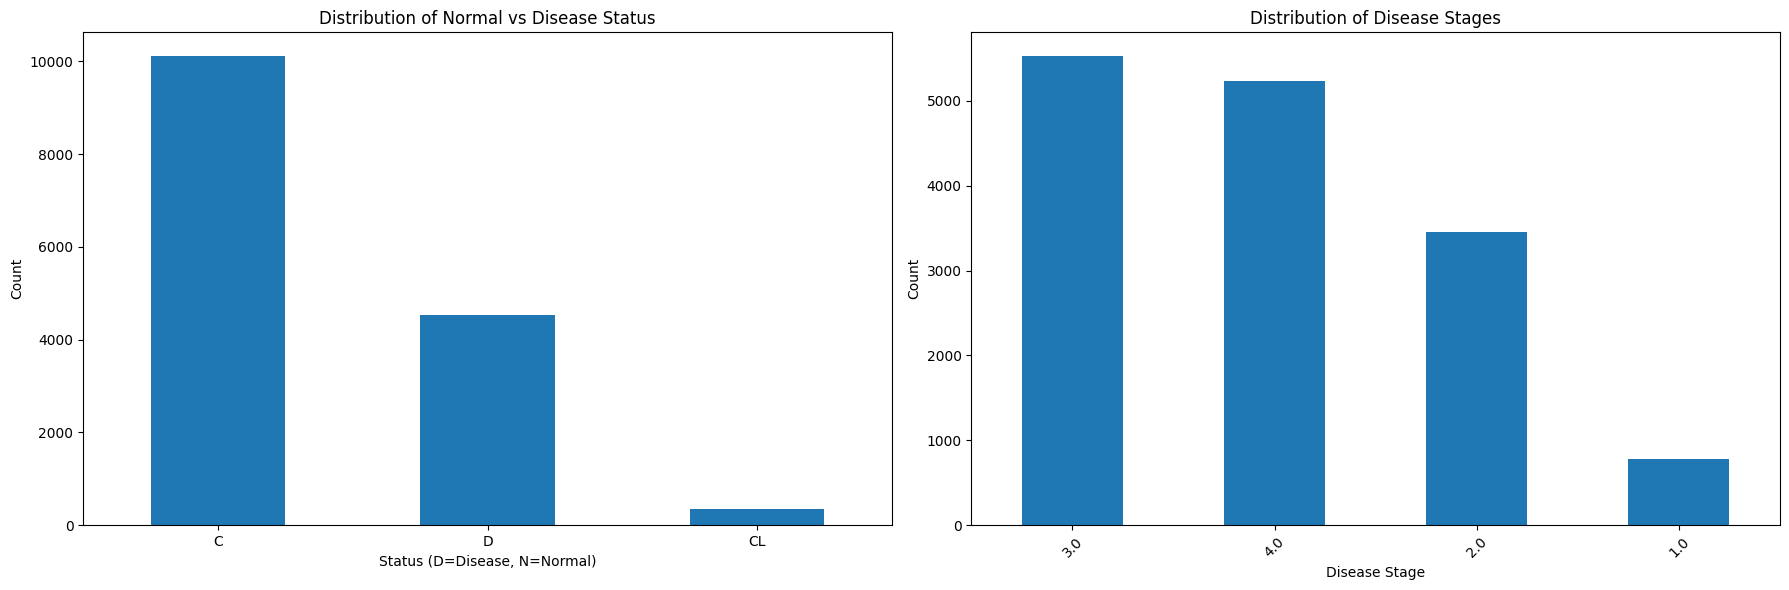

In [ ]:
# 3. Feature distributions and class balance

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))  # 1 row, 2 columns

# Plot distribution of the 'Status' class (Normal vs Disease) on the first subplot
train_df['Status'].value_counts().plot(kind='bar', ax=axes[0])
axes[0].set_title('Distribution of Normal vs Disease Status')
axes[0].set_xlabel('Status (D=Disease, N=Normal)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=0)

# Plot distribution of 'Stage' categories (Stages of the condition) on the second subplot
train_df['Stage'].value_counts().plot(kind='bar', ax=axes[1])
axes[1].set_title('Distribution of Disease Stages')
axes[1].set_xlabel('Disease Stage')
axes[1].set_ylabel('Count')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

# Adjust layout to add space between subplots
plt.tight_layout()

plt.show()


# 2. Split Training Set and Validation Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train.csv` given by the TA. The `test.csv` data is only used for kaggle submission.

In [ ]:
# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

# Split training set and validation set here, store into variables train_set and val_set.
# Remember to also keep the original training set before splitting. This will come important later.
# train_set, val_set = ...

from sklearn.model_selection import train_test_split

# 1. Store original training data
original_train_df = train_df.copy()

# 2. Separate features and target
X = train_df.drop('Status', axis=1)
y = train_df['Status']

# 3. Perform stratified split
X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y  # Maintain class distribution
)

train_set = X_train.copy()
train_set['Status'] = y_train
val_set = X_val.copy()
val_set['Status'] = y_val


# 5. Verify splits
print("Original dataset:", original_train_df.shape)
print("Training set:", train_set.shape)
print("Validation set:", val_set.shape)

print("\nClass distribution:")
print("\nOriginal:")
print(original_train_df['Status'].value_counts(normalize=True))
print("\nTraining:")
print(train_set['Status'].value_counts(normalize=True))
print("\nValidation:")
print(val_set['Status'].value_counts(normalize=True))

Original dataset: (15000, 20)
Training set: (12000, 20)
Validation set: (3000, 20)

Class distribution:

Original:
Status
C     0.674467
D     0.301667
CL    0.023867
Name: proportion, dtype: float64

Training:
Status
C     0.674500
D     0.301667
CL    0.023833
Name: proportion, dtype: float64

Validation:
Status
C     0.674333
D     0.301667
CL    0.024000
Name: proportion, dtype: float64


# 3. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models.

### Reasoning Behind Choosing Data Imputation with Mean/Median/Mode Strategy:

1. **Systematic Pattern in Missing Data**  
   The consistent missing values across several features, with some features like `Cholesterol` (55.5%) and `Tryglicerides` (55.8%) having high missing rates, indicate a systematic pattern in how the data was collected or processed. The missing data is not random, and imputing the values would help maintain the underlying data structure rather than introducing bias or misleading patterns.

2. **Data Volume Preservation**  
   With features like `Drug`, `Ascites`, and `Hepatomegaly` each having over 5,000 missing values (around 43% of the data), removing these rows would drastically reduce the dataset size. This reduction in data could negatively impact the model’s ability to detect complex patterns or rare attack types, which are especially crucial in network security. Imputation preserves data volume, ensuring the analysis includes as much information as possible.

3. **Feature Interdependence**  
   Features like `Drug`, `Ascites`, `Hepatomegaly`, and `Cholesterol` are likely interdependent in medical datasets, and missing values in these features could distort the relationships if deleted. Using imputation methods such as median for numeric data or mode for categorical data helps maintain these feature correlations and natural distributions. Deleting rows with missing values would disrupt these relationships and reduce the overall quality of the data.

4. **Practical Implementation Benefits**  
   The imputation strategy using median for numeric data (e.g., `Platelets`, `Alk_Phos`) and mode for categorical data (e.g., `Drug`, `Ascites`) is computationally efficient and can be applied consistently across the entire dataset. This approach is particularly useful when dealing with a substantial number of missing values, as it allows for reproducible and straightforward implementation on both the training and validation sets, while maintaining the integrity of feature distributions.



In [ ]:
# Check missing values in training set
print("Missing values in train_set:\n")
print(train_set.isnull().sum()[train_set.isnull().sum() > 0])

# Calculate percentage of missing values
missing_percentages = (train_set.isnull().sum() / len(train_set)) * 100
print("\nPercentage of missing values in train_set:\n")
print(missing_percentages[missing_percentages > 0])

Missing values in train_set:

Drug             5201
Ascites          5199
Hepatomegaly     5202
Spiders          5210
Cholesterol      6660
Copper           5287
Alk_Phos         5207
SGOT             5209
Tryglicerides    6694
Platelets         481
Prothrombin        13
dtype: int64

Percentage of missing values in train_set:

Drug             43.341667
Ascites          43.325000
Hepatomegaly     43.350000
Spiders          43.416667
Cholesterol      55.500000
Copper           44.058333
Alk_Phos         43.391667
SGOT             43.408333
Tryglicerides    55.783333
Platelets         4.008333
Prothrombin       0.108333
dtype: float64


In [ ]:
# Write your code here
def handle_missing_data(df):
    print("Before handling missing values:")
    print(df.isnull().sum()[df.isnull().sum() > 0])

    # Make a copy to avoid modifying original
    df_clean = df.copy()

    # Separate columns by type
    numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df_clean.select_dtypes(include=['object']).columns

    # 1. Handle numeric features
    for col in numeric_cols:
        if df_clean[col].isnull().sum() > 0:
            # Use median for features with outliers
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # 2. Handle categorical features
    for col in categorical_cols:
        if df_clean[col].isnull().sum() > 0:
            # Use mode for categorical
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    print("\nAfter handling missing values:")
    print(df_clean.isnull().sum()[df_clean.isnull().sum() > 0])

    return df_clean

# Apply missing data handling
train_df_clean = handle_missing_data(train_set)

Before handling missing values:
Drug             5201
Ascites          5199
Hepatomegaly     5202
Spiders          5210
Cholesterol      6660
Copper           5287
Alk_Phos         5207
SGOT             5209
Tryglicerides    6694
Platelets         481
Prothrombin        13
dtype: int64

After handling missing values:
Series([], dtype: int64)


In [ ]:
# Check missing values in training set
print("Missing values in train_df_clean:\n")
print(train_df_clean.isnull().sum()[train_set.isnull().sum() > 0])

# Calculate percentage of missing values
missing_percentages = (train_df_clean.isnull().sum() / len(train_df_clean)) * 100
print("\nPercentage of missing values in train_df_clean:\n")
print(missing_percentages[missing_percentages > 0])

Missing values in train_df_clean:

Drug             0
Ascites          0
Hepatomegaly     0
Spiders          0
Cholesterol      0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
dtype: int64

Percentage of missing values in train_df_clean:

Series([], dtype: float64)


# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
# 1. FeatureImputer()

class FeatureImputer(BaseEstimator, TransformerMixin):
    def __init__(self, num_strategy='mean', cat_strategy='most_frequent', constant_value=None):
        """
        Custom feature imputer to handle missing values for both numeric and categorical columns.

        Parameters:
        - num_strategy: str, default='mean'
            The imputation strategy for numeric columns. Options are 'mean', 'median', 'constant'.
        - cat_strategy: str, default='most_frequent'
            The imputation strategy for categorical columns. Options are 'most_frequent', 'constant'.
        - constant_value: str or numeric, default=None
            The constant value to use for imputation if 'constant' strategy is chosen for numeric or categorical columns.

        This parameter is mandatory and must be specified when initializing the class.
        """
        # Validate strategies
        if num_strategy not in ['mean', 'median', 'constant']:
            raise ValueError("Invalid numeric strategy. Choose from ['mean', 'median', 'constant']")
        if cat_strategy not in ['most_frequent', 'constant']:
            raise ValueError("Invalid categorical strategy. Choose from ['most_frequent', 'constant']")

        self.num_strategy = num_strategy
        self.cat_strategy = cat_strategy
        self.constant_value = constant_value

        # Create imputer for numerical and categorical columns
        self.num_imputer = SimpleImputer(strategy=self.num_strategy, fill_value=self.constant_value)
        self.cat_imputer = SimpleImputer(strategy=self.cat_strategy, fill_value=self.constant_value)

    def fit(self, X, y=None):
        """
        Fits the imputer on the input data X.
        """
        # Separate numeric and categorical columns
        num_cols = X.select_dtypes(include=[np.number]).columns
        cat_cols = X.select_dtypes(exclude=[np.number]).columns

        # Fit imputer for numeric and categorical columns
        self.num_imputer.fit(X[num_cols])
        self.cat_imputer.fit(X[cat_cols])

        return self

    def transform(self, X):
        """
        Transforms the input data X by imputing missing values.
        """
        # Separate numeric and categorical columns
        num_cols = X.select_dtypes(include=[np.number]).columns
        cat_cols = X.select_dtypes(exclude=[np.number]).columns

        # Impute missing values for numeric and categorical columns separately
        X[num_cols] = self.num_imputer.transform(X[num_cols])
        X[cat_cols] = self.cat_imputer.transform(X[cat_cols])

        return X

    def fit_transform(self, X, y=None):
        """
        Fits the imputer and transforms the input data in a single step.
        """
        # Separate numeric and categorical columns
        num_cols = X.select_dtypes(include=[np.number]).columns
        cat_cols = X.select_dtypes(exclude=[np.number]).columns

        # Fit and transform numeric and categorical columns separately
        X[num_cols] = self.num_imputer.fit_transform(X[num_cols])
        X[cat_cols] = self.cat_imputer.fit_transform(X[cat_cols])

        return X

In [ ]:
#2. Feature Encoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_mappings = {}
        self.categorical_columns = None

    def fit(self, X, y=None):
        # Make a copy to avoid modifying original
        X = X.copy()

        # Identify categorical columns (object dtype)
        self.categorical_columns = X.select_dtypes(include=['object']).columns

        # Create label mappings for each categorical column
        for column in self.categorical_columns:
            unique_values = X[column].unique()
            self.label_mappings[column] = {
                value: index for index, value in enumerate(unique_values)
            }

        return self

    def transform(self, X):
        # Make a copy to avoid modifying original
        X_encoded = X.copy()

        # Transform each categorical column
        for column in self.categorical_columns:
            # Handle new categories in test data
            X_encoded[column] = X_encoded[column].map(self.label_mappings[column]).fillna(-1)

            # Convert to int type
            X_encoded[column] = X_encoded[column].astype(int)

        return X_encoded


In [ ]:
class FeatureScaler(BaseEstimator, TransformerMixin):
    def __init__(self, scaler_type='standard'):
        """
        Custom feature scaler to scale data using different scaling techniques.

        Parameters:
        - scaler_type: str, default='standard'
            The scaling technique to use. Options are 'standard', 'minmax', 'robust'.
        """
        self.scaler_type = scaler_type

        # Choose the appropriate scaler based on the input type
        if self.scaler_type == 'standard':
            self.scaler = StandardScaler()
        elif self.scaler_type == 'minmax':
            self.scaler = MinMaxScaler()
        elif self.scaler_type == 'robust':
            self.scaler = RobustScaler()
        else:
            raise ValueError("Invalid scaler_type. Choose from ['standard', 'minmax', 'robust']")

    def fit(self, X, y=None):
        """
        Fits the scaler on the input data X.
        """
        # Separate numeric columns from categorical columns
        self.num_cols = X.select_dtypes(include=[np.number]).columns
        # Apply the scaler only to the numeric columns
        self.scaler.fit(X[self.num_cols])
        return self

    def transform(self, X):
        """
        Transforms the input data X by scaling the features.
        """
        # Apply scaling only to the numeric columns
        X_scaled = X.copy()
        X_scaled[self.num_cols] = self.scaler.transform(X[self.num_cols])
        return X_scaled

    def fit_transform(self, X, y=None):
        """
        Fits the scaler and transforms the input data in a single step.
        """
        # Separate numeric columns from categorical columns
        self.num_cols = X.select_dtypes(include=[np.number]).columns
        # Apply scaling only to the numeric columns
        X_scaled = X.copy()
        X_scaled[self.num_cols] = self.scaler.fit_transform(X[self.num_cols])
        return X_scaled

In [ ]:
#4 Dimensionality Reduction
class NetworkDimensionalityReducer(BaseEstimator, TransformerMixin):
    def __init__(self, n_components=5):
        self.n_components = n_components
        self.scaler = StandardScaler()
        self.pca = PCA(n_components=n_components)
        self.feature_names_ = None

    def fit(self, X, y=None):
        """Learn PCA parameters from training data"""
        self.feature_names_ = X.select_dtypes(include=['float64', 'int64']).columns
        X_numeric = X[self.feature_names_]
        X_scaled = self.scaler.fit_transform(X_numeric)
        self.pca.fit(X_scaled)
        return self

    def transform(self, X):
        """Apply PCA transformation"""
        X_numeric = X[self.feature_names_]
        X_scaled = self.scaler.transform(X_numeric)
        X_pca = self.pca.transform(X_scaled)
        return pd.DataFrame(
            X_pca,
            columns=[f'PC{i+1}' for i in range(self.n_components)],
            index=X.index
        )

In [ ]:
# from sklearn.pipeline import Pipeline

# # Note: You can add or delete preprocessing components from this pipeline

pipe = Pipeline([("imputer", FeatureImputer(num_strategy='mean', cat_strategy='most_frequent')),
                 ("encoder", FeatureEncoder()),
                 ("scaler", FeatureScaler(scaler_type='standard')),
                 ("dimensionality", NetworkDimensionalityReducer(n_components=5))
                ])

train_set_clean = pipe.fit_transform(train_df_clean)
val_set_clean = pipe.transform(val_set)

In [ ]:
# # Your code should work up until this point
# train_set = pipe.fit_transform(train_set)
# val_set = pipe.transform(val_set)

or create your own here

In [ ]:
# Write your code here

# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the probability for each class in the `Status` feature (`Status_C`, `Status_CL`, `Status_D`). Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## KNN

In [ ]:
# Type your code here

reducer = NetworkDimensionalityReducer(n_components=20)
X_train_reduced = reducer.fit_transform(train_set_clean)
X_val_reduced = reducer.transform(val_set_clean)

X_train = X_train_reduced.values
y_train = train_set_clean['attack_cat'].values
X_val = X_val_reduced.values
y_val = val_set_clean['attack_cat'].values

# Create and train sklearn's KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_val)

# Print performance metrics
print("Sklearn KNN Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred))

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_val, y_pred),
            annot=True,
            fmt='d',
            xticklabels=knn.classes_,
            yticklabels=knn.classes_)
plt.title('Confusion Matrix - Sklearn KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Naive Bayes

In [ ]:
# Type your code here

## ID3

In [ ]:
# Type your code here

## SVM

In [ ]:
# Type your code here
reducer = NetworkDimensionalityReducer(n_components=20)
X_train_reduced = reducer.fit_transform(train_set_clean)
X_val_reduced = reducer.transform(val_set_clean)

X_train = X_train_reduced.values
y_train = train_set_clean['attack_cat'].values
X_val = X_val_reduced.values
y_val = val_set_clean['attack_cat'].values

# Create and train sklearn's SVM (Support Vector Machine)
svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)  # Using RBF kernel
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_val)

# Print performance metrics
print("Sklearn SVM Performance:")
print(f"Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_val, y_pred))

# Plot confusion matrix
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_val, y_pred),
            annot=True,
            fmt='d',
            xticklabels=svm.classes_,
            yticklabels=svm.classes_)
plt.title('Confusion Matrix - Sklearn SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Logistic Regression

In [ ]:
# Type your code here

## Notes for improvements

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

- **Ensemble methods**

Ensemble methods are powerful machine learning techniques that combine the predictions of multiple models (often referred to as base learners or weak learners) to create a stronger, more accurate predictive model. The idea behind ensemble methods is that by aggregating the opinions of multiple models, you can reduce the impact of individual model errors and improve overall prediction performance. (Hint: bagging, boosting, stacking, voting)

- **Model interpretation**

Model interpretation is the process of understanding and explaining the inner workings of a machine learning model, particularly its decision-making process. Interpretation helps data scientists, stakeholders, and end-users gain insights into why a model makes certain predictions or classifications. Model interpretation is crucial for building trust in machine learning systems, identifying biases, and extracting actionable information from models. (Hint: Feature importance, PDP, SHAP Values, etc)

- **Explore other models**

There are a lot of ML models that you can use in this usecase. Try to explore and use them to solve this problem.

## Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id`, `Status_C`, `Status_CL`, `Status_D` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`